In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lecture 23 ##

### Percentiles

In [2]:
x = make_array(43, 20, 51, 7, 28, 34)
y = np.sort(x)
y

array([ 7, 20, 28, 34, 43, 51], dtype=int64)

In [3]:
0.55 * 6

3.3000000000000003

In [4]:
percentile(55, x)

34

### Bootstrap

In [5]:
sf = Table.read_table('san_francisco_2015.csv')

In [6]:
sf.where('Job', 'Mayor')

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,MYR,Mayor,556,Elected Officials,1100,Administrative & Mgmt (Unrep),1190,Mayor,22433,288964,0,0,288964,58117,12424.5,20293,90834.5,379798


In [7]:
10 * 20 * 52   # hours threshold for part time

10400

In [8]:
sf = sf.where('Total Compensation', are.above(10000))

In [9]:
sf.num_rows

38217

In [10]:
percentile(50, sf.column('Total Compensation'))

107219.48

In [11]:
our_sample = sf.sample(300, with_replacement=False)
our_sample

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",2100,Hospital Administration,2112,Medical Records Technician,43925,57394.7,3404.86,1516.81,62316.4,11937.6,9945.58,5205.11,27088.2,89404.6
Calendar,2015,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,790,"SEIU - Miscellaneous, Local 1021",2700,Housekeeping & Laundry,2708,Custodian,4779,56531,0,7153.59,63684.6,13799,12424.5,4698.26,30921.8,94606.4
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,31694,27619.8,663.37,5227.14,33510.4,6179.97,4258.98,736.68,11175.6,44686
Calendar,2015,1,Public Protection,SHF,Sheriff,498,Deputy Sheriffs' Association,8300,Correction & Detention,8304,Deputy Sheriff,35273,95052.4,16060,8552.35,119665,25207.1,12077.8,1992.61,39277.4,158942
Calendar,2015,2,"Public Works, Transportation & Commerce",DBI,Department of Building Inspection,790,"SEIU - Miscellaneous, Local 1021",6300,Construction Inspection,6322,Permit Technician II,48655,42023,0,0,42023,8648.05,8123.71,3403.2,20175,62198
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,0932,Manager IV,13564,162330,0,0,162330,32669.1,12424.5,28019.7,73113.4,235443
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,14653,70728.6,674.91,1055.21,72458.7,14081.1,10847.5,5103.8,30032.4,102491
Calendar,2015,6,General Administration & Finance,HSS,Health Service System,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2500,Med Therapy & Auxiliary,2593,Health Program Coordinator 3,46153,39751.3,0,0,39751.3,7483.1,5871.77,3053.38,16408.2,56159.5
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2320,Registered Nurse,8573,149099,0,26099,175198,31473.2,12424.5,4660.53,48558.2,223756
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2320,Registered Nurse,14925,121201,22.25,273.74,121497,20146,11976.5,8181.94,40304.5,161802


In [12]:
percentile(50, our_sample.column('Total Compensation'))

93353.910000000003

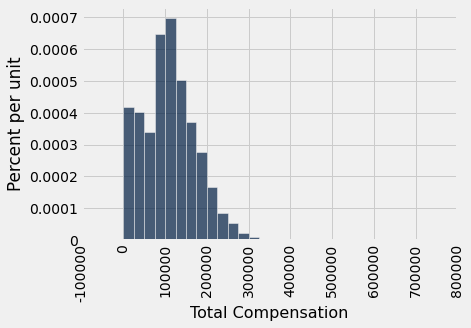

In [13]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

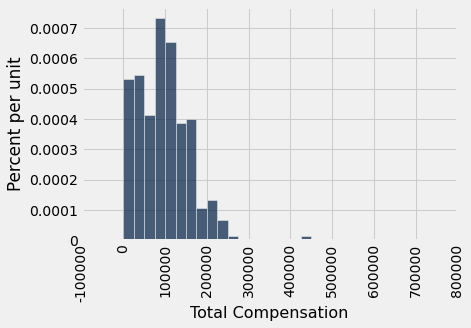

In [14]:
our_sample.hist('Total Compensation', bins=sf_bins)

In [15]:
resample1 = our_sample.sample(300, with_replacement=True)

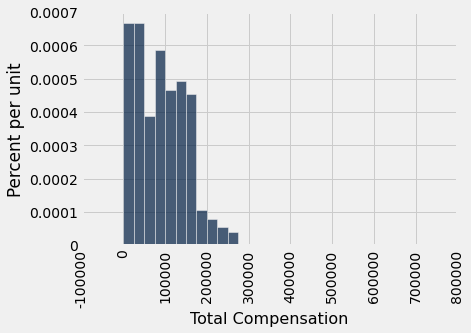

In [16]:
resample1.hist('Total Compensation', bins=sf_bins)

In [17]:
resample2 = our_sample.sample()

In [18]:
percentile(50, resample1.column('Total Compensation'))

89028.679999999993

In [19]:
percentile(50, resample2.column('Total Compensation'))

96252.389999999999

In [20]:
medians = make_array()

for i in np.arange(1000):
    resampled = our_sample.sample()
    median = percentile(50, resampled.column('Total Compensation'))
    medians = np.append(medians, median)

In [21]:
def bootstrap_median(original_sample, label, replications):
    """Simulate sample median:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample medians
    """
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample()
        resampled_median = percentile(50, bootstrap_sample.column(label))
        medians = np.append(medians, resampled_median)
        
    return medians

In [22]:
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 1000)

In [23]:
pop_median = percentile(50, sf.column('Total Compensation'))

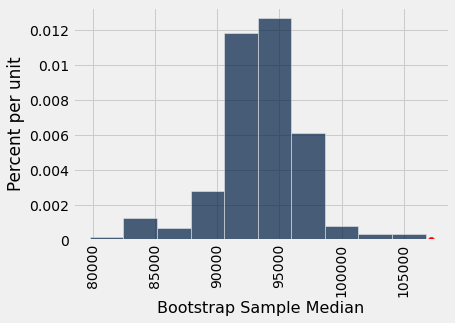

In [24]:
resampled_medians = Table().with_column(
    'Bootstrap Sample Median', bstrap_medians)

resampled_medians.hist()

plots.scatter(pop_median, 0, color='red', s=40);

In [25]:
left = percentile(2.5, bstrap_medians)
left

84920.179999999993

In [26]:
right = percentile(97.5, bstrap_medians)
right

99963.339999999997

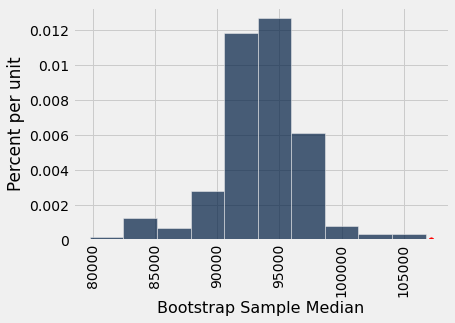

In [27]:
resampled_medians.hist()

plots.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color='red', s=30, zorder=2);

In [28]:
confidence_interval = make_array(left, right)
confidence_interval

array([ 84920.18,  99963.34])

In [29]:
# THE BIG SIMULATION: This one takes a long time.

# Generate the endpoints of 50 intervals

left_ends = make_array()
right_ends = make_array()

for i in np.arange(50):
    first_sample = sf.sample(300, with_replacement=False)
    medians = bootstrap_median(first_sample, 'Total Compensation', 2000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

In [30]:
intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)    

In [31]:
intervals

Left,Right
100488,114021
100341,118347
97634.3,111519
104374,116924
99076.7,110903
98520.1,115145
105176,117414
97689.6,113238
106425,118340
103018,120878


In [32]:
good = intervals.where('Left', are.below(pop_median)).where('Right', are.above(pop_median)).num_rows

In [33]:
good / 50

0.98

Following comment and image is taken from textbook Section 13.2.  Objective is to demonstrate that about 95% of the time the process will produce an interval that contains the median of the population.  That is that the "process works."   DS

It takes many minutes to construct all the intervals, but try it again if you have the patience. Most likely, about 95 of the 100 intervals will be good ones: they will contain the parameter.

It’s hard to show you all the intervals on the horizontal axis as they have large overlaps – after all, they are all trying to estimate the same parameter. The graphic below shows each interval on the same axes by stacking them vertically. The vertical axis is simply the number of the replication from which the interval was generated.

The green line is where the parameter is. It has a fixed position since the parameter is fixed.

Good intervals cover the parameter. There are approximately 95 of these, typically.

If an interval doesn’t cover the parameter, it’s a dud. The duds are the ones where you can see “daylight” around the green line. There are very few of them – about 5 out of 100, typically – but they do happen.

Any method based on sampling has the possibility of being off. The beauty of methods based on random sampling is that we can quantify how often they are likely to be off.

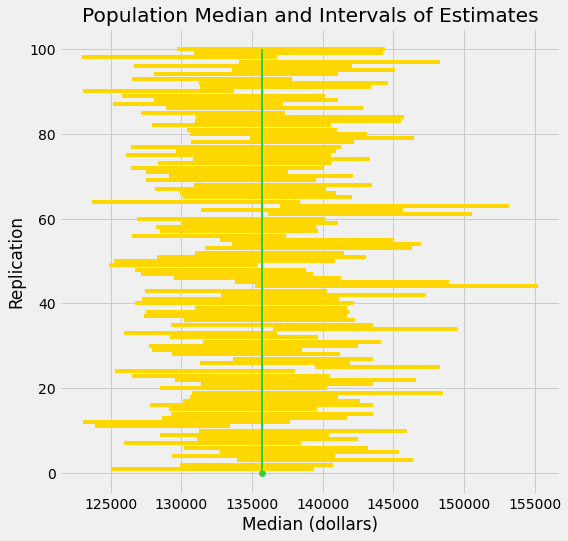

To summarize what the simulation shows, suppose you are estimating the population median by the following process:

Draw a large random sample from the population.

Bootstrap your random sample and get an estimate from the new random sample.

Repeat the above bootstrap step thousands of times, and get thousands of estimates.

Pick off the “middle 95%” interval of all the estimates.

That gives you one interval of estimates. If 99 other people repeat the entire process, starting with a new random sample each time, then you will end up with 100 such intervals. About 95 of these 100 intervals will contain the population parameter.

In other words, this process of estimation captures the parameter about 95% of the time.

You can replace 95% by a different value, as long as it’s not 100. Suppose you replace 95% by 80% and keep the sample size fixed at 500. Then your intervals of estimates will be shorter than those we simulated here, because the “middle 80%” is a smaller range than the “middle 95%”. If you keep repeating this process, only about 80% of your intervals will contain the parameter.